In [1]:
# Initial imports
import pandas as pd
from path import Path
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# We will start importing the 25M MovieLens Dataset which has been downloaded from https:/grouplens.org/movielens
# The first file is the list of movies
file_path = Path('movies.csv')
movies_df = pd.read_csv(file_path)
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies_df.shape

(62423, 3)

In [4]:
# We see that there are ~62k movies in this dataframe.  
movies_df.movieId.count()

62423

In [5]:
# Now lets import the movie ratings file
file_path2 = Path('ratings.csv')
ratings_df = pd.read_csv(file_path2)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
# Now let's import the genome-score file which has  ~1k tags with each movie's relevanance score to that tag
file_path5 = Path('genome-scores.csv')
genomescores_df = pd.read_csv(file_path5)
genomescores_df.head(5)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [7]:
# This dataframe is rather large since it has tagIds and the relevant match each original 62k movies in the dataset
genomescores_df.shape

(15584448, 3)

In [8]:
# Are all of the movies scored for each tag?
genomechecks_df=genomescores_df.groupby('movieId').count()
genomechecks_df.head()

,tagId,relevance
movieId,,
1,1128,1128
2,1128,1128
3,1128,1128
4,1128,1128
5,1128,1128


In [9]:
genomechecks_df.shape

(13816, 2)

In [10]:
# It seems that only 13,816 movies have genome scoring out of the original 62,423 movies


In [11]:
genomechecks_df.to_csv('genomechecksbymoviecounts.csv')

In [12]:
# If every tagId was scored for the 13816 movies then the tagId col sum should be 13816*1128*(1128+1)/2
genomechecks2_df=genomescores_df.groupby('movieId').sum()
genomechecks2_df.head()

,tagId,relevance
movieId,,
1,636756,184.29475
2,636756,137.84750
3,636756,103.90025
4,636756,98.49475
5,636756,105.99400


In [13]:
genomechecks2_df.to_csv('genomechecksbymoviesumoftagids.csv')

In [14]:
a=13816*1128*(1128+1)*0.5
a

8797420896.0

In [15]:
genomechecks2_df.sum()

tagId        8.797421e+09
relevance    1.813529e+06
dtype: float64

In [16]:
#looks like every tag was scored on the 13816 movies since the sums of tagID match

In [17]:
# let's see if which movies have the lowest genome score summation. 
genomechecks2_df.sort_values(by=['relevance'],ascending=True)

,tagId,relevance
movieId,,
4601,636756,49.12875
1138,636756,49.25700
116985,636756,49.82125
129781,636756,52.12825
110426,636756,57.63250
...,...,...
5978,636756,311.78600
127144,636756,317.44125
102062,636756,317.86125


In [18]:
genomechecks2_df.sort_values(by=['relevance'],ascending=True,inplace=True)

In [19]:
genomechecks2_df.head()

,tagId,relevance
movieId,,
4601,636756,49.12875
1138,636756,49.25700
116985,636756,49.82125
129781,636756,52.12825
110426,636756,57.63250


In [20]:
genomechecks2_df.reset_index(inplace=True)

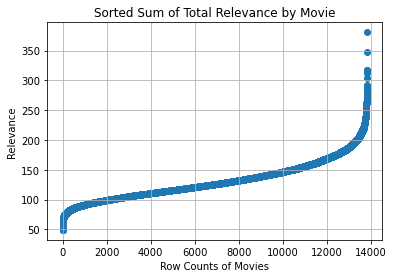

In [21]:
x_axis=genomechecks2_df.index
y_axis=genomechecks2_df.relevance
plt.scatter(x_axis,y_axis)
plt.xlabel('Row Counts of Movies')
plt.ylabel('Relevance')
plt.title('Sorted Sum of Total Relevance by Movie')
plt.grid(True)

In [22]:
# let's now look if there is a tag that has low relevance sum for all movies
tagidrelevance_df=genomescores_df.pivot(index='movieId',columns='tagId',values='relevance')


In [23]:
tagidrelevance_df.head()

tagId,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,0.03075,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,0.05250,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,0.03875,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,0.03150,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,0.02975,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


In [24]:
tagidrelevance_Series=tagidrelevance_df.sum()

In [25]:
tagidrelevance_Series.sort_values(ascending=True,inplace=True)

In [26]:
tagidrelevance_Series

tagId
489       56.63675
119       76.30025
117       97.52975
573      101.47750
976      101.94950
          ...     
972     6220.35175
468     6568.13100
188     6586.79875
646     7482.43975
742    10008.64400
Length: 1128, dtype: float64

In [27]:
tagidrelevance_Seriesplot=tagidrelevance_Series.reset_index(drop=True)

In [28]:
tagidrelevance_Seriesplot

0          56.63675
1          76.30025
2          97.52975
3         101.47750
4         101.94950
           ...     
1123     6220.35175
1124     6568.13100
1125     6586.79875
1126     7482.43975
1127    10008.64400
Length: 1128, dtype: float64

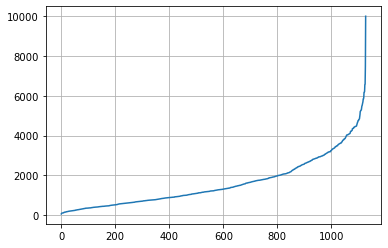

In [29]:
tagidrelevance_Seriesplot.plot()
plt.grid(True)

In [30]:
# it appears that many tagIds have a summed relavence score for all movies that is low 
# this would seem to indicate that those tags were not adding much value to movie selections
# base on the plot above tags with a relevance sum over 3000 starts to add a lot of value
# how many tags does that leave us?

In [31]:
tagidrelevancesum_df=tagidrelevance_Series.to_frame()

In [32]:
tagidrelevancesum_df.rename(columns={0:"tagrelevancesum"},inplace=True)
tagidrelevancesum_df

,tagrelevancesum
tagId,
489,56.63675
119,76.30025
117,97.52975
573,101.47750
976,101.94950
...,...
972,6220.35175
468,6568.13100
188,6586.79875


In [33]:
relevantagids_df=tagidrelevancesum_df.loc[tagidrelevancesum_df['tagrelevancesum']>3000]

In [34]:
relevantagids_df

,tagrelevancesum
tagId,
806,3001.95325
143,3002.19475
29,3004.03650
531,3009.62700
951,3021.22300
...,...
972,6220.35175
468,6568.13100
188,6586.79875


In [35]:
# By importing the genome-tags file we can see what text is represented by the tagId
file_path4 = Path('genome-tags.csv')
genometags_df = pd.read_csv(file_path4)
genometags_df.head(10)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


In [36]:
# df=pd.merge(movies_dfshort,genomescores_dfshort,on='movieId', how='left')

importanttagids_df=pd.merge(relevantagids_df,genometags_df,on='tagId',how='left')

In [37]:
importanttagids_df

,tagId,tagrelevancesum,tag
0,806,3001.95325,powerful ending
1,143,3002.19475,bleak
2,29,3004.03650,adventure
3,531,3009.62700,idealism
4,951,3021.22300,special effects
...,...,...,...
154,972,6220.35175,storytelling
155,468,6568.13100,great ending
156,188,6586.79875,catastrophe
157,646,7482.43975,mentor


In [38]:
importanttagids_df.to_csv('tags_of_higher_relevance.csv')

In [39]:
# if we limit our tags to just these 159 tags then how many movies are removed?
tagIdlist=importanttagids_df.tagId.unique()

In [40]:
tagIdlist

array([ 806,  143,   29,  531,  951,  710,  447,  519,  366,  129,  414,
        743,  761, 1014,  275,  387,  272,  122,  747,   75, 1054,  325,
        100,  920,  937,  614,  478,  138,   46, 1114,  995, 1020,  121,
        230,  335,  625, 1072,  727,  216,  443,  745,  446,  694, 1123,
       1057,  759,   30,  823,  792,  967,  870,   18,  481,  557,  113,
       1116, 1090,  355,  726,  107, 1085,  911,   19,  396,  412,  368,
       1101,  787,  474,  910,  609,  897,  192,  845,  203, 1062,  682,
        691,  771,  365,  388,  733,  324,  933,  424,   86,  829,  276,
        328,  490,   22, 1084, 1073,  585,  610,  850, 1071,  469,  240,
        846,  797,  554,  266,  493,  389,  540,  356, 1040,  374,  292,
        719,  982,  936,  415,  601,  750,  603,  553,  992, 1064,  351,
       1051,  299,  258,  844,  801,  220,  777,  378,  128,  999,  465,
        536, 1008,  807,   21,  212,  277,  602, 1091,  323,  472,  169,
        270,  640,  971,  464,  445,  195, 1070, 11

In [41]:
moviestaglimited_df=genomescores_df.loc[genomescores_df['tagId'].isin(tagIdlist)]
moviestaglimited_df.groupby('movieId').count()
# it looks like we still have 13816 movies

,tagId,relevance
movieId,,
1,159,159
2,159,159
3,159,159
4,159,159
5,159,159
...,...,...
205072,159,159
205076,159,159
205383,159,159


In [49]:
df=pd.merge(moviestaglimited_df,movies_df,on='movieId',how='left')

In [50]:
df.head()

,movieId,tagId,relevance,title,genres
0,1,18,0.10400,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,19,0.66250,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,21,0.31675,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1,22,0.28600,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,1,29,0.89375,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [51]:
#df.loc[(df['tagId']==801) & (df['relevance']>.8)]
df.loc[df['tagId']==801]

,movieId,tagId,relevance,title,genres
111,1,801,0.17600,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
270,2,801,0.17400,Jumanji (1995),Adventure|Children|Fantasy
429,3,801,0.25150,Grumpier Old Men (1995),Comedy|Romance
588,4,801,0.23775,Waiting to Exhale (1995),Comedy|Drama|Romance
747,5,801,0.19425,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
2196060,205072,801,0.24425,Zombieland: Double Tap (2019),Action|Comedy|Horror
2196219,205076,801,0.43800,Downton Abbey (2019),Drama
2196378,205383,801,0.46550,El Camino: A Breaking Bad Movie (2019),Crime|Drama|Thriller
2196537,205425,801,0.53025,Dave Chappelle: Sticks & Stones (2019),Comedy


In [52]:
df = df.join(df.pop('genres').str.get_dummies('|'))

In [53]:
df.head()

,movieId,tagId,relevance,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,18,0.10400,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,19,0.66250,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,21,0.31675,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,22,0.28600,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,29,0.89375,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df.shape

(2196744, 24)